# Discharge Kapasitor

<h3 align="center" style="background-color:#000051; padding:5px; color:white;">Persamaan </h3>

![Skematik](Capture.JPG)

Persamaan Charging Kapasitor : <br>
$V_{c} = V_{s}(e^{-t/RC})$

<h3 align="center" style="background-color:#000051; padding:5px; color:white;">Parameter Simulasi</h3>

Parameter Simulasi sbb:<br>
C = 40 uF<br>
Vs = 596 V<br>
Tmaks = 5.1 s<br>
Ts = 0.1 s<br>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## init Parameter
C = 40 * 10 **-6 #F
V = 596 #V
ts =0.1
time = np.arange(0,5.1,0.1)

df = pd.DataFrame({'waktu':time})
df.tail()

,waktu
46,4.6
47,4.7
48,4.8
49,4.9
50,5.0


<h3 align="center" style="background-color:#000051; padding:5px; color:white;">Simulasi Discharge Kapasitor 1</h3>

In [5]:
vc = np.zeros(len(df))
ic = np.zeros(len(df))
w = np.zeros(len(df))

e = 2.1782

vc[0] = 0 # inisial tegangan kapasitor
r = 1000
threshold = False

for i in df.index:
    vc[i] = V*((e ** (-df['waktu'][i]/(r*C) )))
    if(vc[i] > (V*0.9)):
        if not threshold:
            print("waktunya : ", df['waktu'][i])
            print("Tegangan : ", vc[i])
            threshold = True
    ic[i] = (vc[i])/r
    w[i] = (ic[i]**2)*r
df['vc'] = vc
df['i'] = ic
df['w'] = w
df.head()

waktunya :  0.0
Tegangan :  596.0


,waktu,vc,i,w
0,0.0,596.000000,0.596000,355.216000
1,0.1,85.114171,0.085114,7.244422
2,0.2,12.155071,0.012155,0.147746
3,0.3,1.735854,0.001736,0.003013
4,0.4,0.247896,0.000248,0.000061


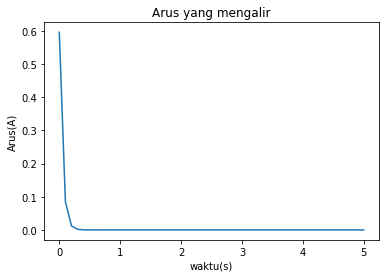

In [6]:
plt.plot(df['waktu'], df['i'])  
plt.xlabel('waktu(s)')
plt.ylabel('Arus(A)')
plt.title('Arus yang mengalir')
plt.show()

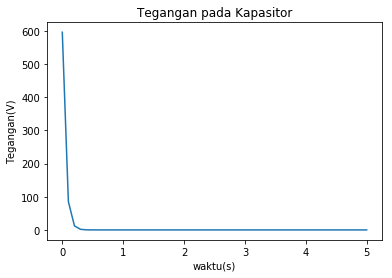

In [7]:
plt.plot(df['waktu'], df['vc'])  
plt.xlabel('waktu(s)')
plt.ylabel('Tegangan(V)')
plt.title('Tegangan pada Kapasitor')
plt.show()

<h3 align="center" style="background-color:#000051; padding:5px; color:white;">Simulasi Mencari Resistor Discharge Yang cocok</h3>

In [9]:
# init loping
r = 100
r_add = 100
OutOfTimeCharging = False
dataRes = np.empty(0)
dataV = np.empty(0)
dataTime = np.empty(0)
dataMaxI = np.empty(0)
dataMaxW = np.empty(0)

## Begin looping

while not OutOfTimeCharging:
    v_cap = np.zeros(len(df))
    i_cap = np.zeros(len(df))
    w = np.zeros(len(df))
    w_max = 0
    I_max = 0
    threshold = False
    
    
    for i in df.index:    
        v_cap[i] = V*((1/( e**(df['waktu'][i]/(r*C)))))
        i_cap[i] = (v_cap[i])/r
        w[i] = i_cap[i]*(v_cap[i])
        if(w[i] > w_max):
            w_max = w[i]
        if(i_cap[i] > I_max):
            I_max = i_cap[i]
        if(v_cap[i] < (60)):
            if not threshold:
#                 Print in cmd
#                 print("Dengan Resistor : ", r)
#                 print("Waktunya : ",df['waktu'][i])
#                 print("Tegangan : ",v_cap[i])
                dataV = np.append(dataV, v_cap[i])
                dataTime = np.append(dataTime, df['waktu'][i])
                dataMaxI = np.append(dataMaxI, I_max)
                dataMaxW = np.append(dataMaxW, w_max)
                dataRes = np.append(dataRes, r)   
                threshold = True
    ## Increase R
    if threshold:
        r = r+r_add
    else:
        OutOfTimeCharging = True
    ## Limit to max res 15kOhm
    if (r>15000):
        OutOfTimeCharging = True
        
looking_res = pd.DataFrame({'resistor' : dataRes,'voltage':dataV,'time':dataTime, 'maxI':dataMaxI, 'maxW':dataMaxW})
looking_res

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars


,resistor,voltage,time,maxI,maxW
0,100.0,0.000002,0.1,5.960000,3552.160000
1,200.0,0.035402,0.1,2.980000,1776.080000
2,300.0,0.907329,0.1,1.986667,1184.053333
3,400.0,4.593411,0.1,1.490000,888.040000
4,500.0,12.155071,0.1,1.192000,710.432000
5,600.0,23.254426,0.1,0.993333,592.026667
6,700.0,36.961900,0.1,0.851429,507.451429
7,800.0,52.322776,0.1,0.745000,444.020000
8,900.0,7.887246,0.2,0.662222,394.684444
9,1000.0,12.155071,0.2,0.596000,355.216000


## Mencari resistor yang mampu sampai 100W

In [10]:
looking_res.loc[looking_res['maxW'] < 100]

,resistor,voltage,time,maxI,maxW
35,3600.0,39.929670,0.5,0.165556,98.671111
36,3700.0,42.956028,0.5,0.161081,96.004324
37,3800.0,46.034412,0.5,0.156842,93.477895
38,3900.0,49.158612,0.5,0.152821,91.081026
39,4000.0,52.322776,0.5,0.149000,88.804000
40,4100.0,55.521402,0.5,0.145366,86.638049
41,4200.0,58.749334,0.5,0.141905,84.575238
42,4300.0,39.430791,0.6,0.138605,82.608372
43,4400.0,41.941145,0.6,0.135455,80.730909
44,4500.0,44.489113,0.6,0.132444,78.936889


Yang Kita Ambil adalah 4000 Ohm